david visulization 6/27 - 6/28

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns
from shapely.geometry import Point, Polygon

In [ ]:
'/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv'

In [3]:
grocery_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
grocery_2022.head()


,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,116,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,...,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,120,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,...,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,247,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,...,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,349,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,...,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,470,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,...,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [4]:
grocery_2022.count()

Unnamed: 0                      203503
COMPANY                         203491
ADDRESS LINE 1                  203096
CITY                            203503
STATE                           203503
ZIPCODE                         203503
ZIP4                            177600
COUNTY CODE                     203478
AREA CODE                       203503
IDCODE                          203503
LOCATION EMPLOYEE SIZE CODE     156145
LOCATION SALES VOLUME CODE      151918
PRIMARY SIC CODE                203503
SIC6_DESCRIPTIONS               203503
PRIMARY NAICS CODE              199775
NAICS8 DESCRIPTIONS             199775
SIC CODE                         82559
SIC6_DESCRIPTIONS (SIC)          82517
SIC CODE 1                       44804
SIC6_DESCRIPTIONS (SIC1)         44777
SIC CODE 2                       21065
SIC6_DESCRIPTIONS(SIC2)          21053
SIC CODE 3                        7741
SIC6_DESCRIPTIONS(SIC3)           7731
SIC CODE 4                        2769
SIC6_DESCRIPTIONS(SIC4)  

In [5]:
g22S =grocery_2022.groupby(['STATE']).sum()
g22S

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
STATE,,,,,,,,,,,,,,,,,,,,,
AK,34042517,APA ASIAN MARKETNEWTOK NATIVE CORPD F JORGENSE...,300 W 36TH AVE101 HONDA WAY1 JORGENSEN PLZ500 ...,ANCHORAGENEWTOKALAKANUKANCHORAGEGAKONAANCHORAG...,40459796,1139331.0,42306.0,367443,812,ACBCACBFACABCDCADDBFDGACACABBACCBCAABAFAFBAAAC...,...,1999,1.259102e+06,985.0,24760.392231,-6.022136e+04,PXXPXPPPXXXPXPPPXXPPXPPPPPX4PXXPPPPPXXPPP44PPX...,3678480.0,410.0,0.0,854306.0
AL,259265271,MI RANCHITOWITTS MARKETGARDENDALE FOODLANDDALE...,2204 MORGAN RD2531 DECATUR HWY1014 MAIN ST103 ...,BESSEMERGARDENDALEGARDENDALEHANCEVILLEARABHOLL...,107769428,11257439.0,225156.0,786553,6008,AAEBBBCAAAABDFDABADAAABBDAAAABACAAACAEABAAAAEB...,...,17595,5.240625e+08,6386.0,99087.009964,-2.605394e+05,PP4PPPPXPPPPPPPPXPPP00PPPPPXP0PPPPPPPP0PPPPP0P...,65059730.0,4935.0,576817.0,3229156.0
AR,158883584,HYDRATION STATIONHARPS FOOD STORESSPEED-E-MART...,3316 WHEELER AVE500 W MAIN ST309 E CENTER ST23...,FORT SMITHCHARLESTONGREENWOODVAN BURENFORT SMI...,132792805,8511206.0,147006.0,1194236,3672,ADBCCBCDAADBCABBDAADCDCCAAAAABCAABCAABCBDEABBC...,...,10658,5.891926e+08,3987.0,64546.185018,-1.701472e+05,PXXPPPPPPPPPP4PPPPPPP0PPPPPXPPXPPPPPPP0PPPPPPP...,40646360.0,2538.0,230704.0,9327006.0
AZ,290437444,BOB'S MARKETAMPMSAFEWAYLA SONORENSE TORTILLA F...,12312 N 32ND ST4249 E THOMAS RD4811 N 83RD AVE...,PHOENIXPHOENIXPHOENIXPHOENIXPHOENIXPHOENIXPHOE...,289831487,12979523.0,49005.0,2089393,6786,AAECAABBEFACCBAACFBAACFBFCACACEACECDFEFABBBFFA...,...,22339,8.876727e+08,6543.0,113439.049204,-3.795199e+05,0PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP...,129137460.0,6479.0,1225848.0,13621005.0
CA,2213848891,7-ELEVENEL SOL MARKETCIRCLE KEL SOL MEAT MARKE...,485 E MAIN ST110 W MAIN ST123 E MAIN ST1100 ME...,EL CENTROWESTMORLANDWESTMORLANDCALEXICOTWENTYN...,2408664559,88499107.0,1445260.0,16185920,51791,BBBDCEAFCECDBBAACEBDEAAABDEBACABCCCAEBFBCCACBB...,...,176777,5.134810e+09,51805.0,922029.980551,-3.095674e+06,0XXPPPPPPPPPPPPPPPPPPPP0PPPPPPPPPPPPPPPPPP0PPP...,928372560.0,50700.0,8471508.0,156791187.0
CO,339443551,NATURAL GROCERSELECTRIC CHARGING STATIONELECTR...,3440 S TOWER RD10300 E SOUTH BOULDER RD17975 E...,AURORALAFAYETTEAURORABROOMFIELDTHORNTONLAFAYET...,316698846,13656891.0,177280.0,2284137,7862,DADBAACBBBBFBBACAABAABBBAAABAECAABFFDDBFEBBEBB...,...,24571,5.109431e+08,7889.0,155373.325097,-4.141854e+05,PP0PPPPPXPPPPPP0XXP4PPPPPPPPPX0PPPP4PPXPP4PPPP...,73634940.0,6673.0,632360.0,31625250.0
CT,214360790,ELECTRIC CHARGING STATIONKRAUSZER'S FOOD STORE...,514 OLD WHITFIELD ST170 CEDAR ST517 BOSTON POS...,GUILFORDBRANFORDMILFORDMILFORDSOUTHINGTONSHELT...,16152765,7501936.0,13900.0,1320656,5016,BBAAAEAAFACABAABACCABABAAAABFAACDAAAFACAABAAAF...,...,16028,8.628263e+08,5396.0,104051.371333,-1.827634e+05,0PPPPXPPPP0PPPPPXP4PPPPPPPPP0PPXPP0PPPPPXPPXP0...,69451800.0,4898.0,868564.0,22585900.0
DC,48772716,727 MARKETWHOLE FOODS MARKETTOWN & COUNTRY MAR...,2820 GEORGIA AVE NW4530 40TH ST NW823 UPSHUR S...,WASHINGTONWASHINGTONWASHINGTONWASHINGTONWASHIN...,11219378,1717438.0,560.0,114707,1120,AFAABAACABBAFFAAACACABBFDACAAAAGAAAAAAAABAAACC...,...,3510,3.755040e+06,979.0,21787.131495,-4.313184e+04,PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP...,26824000.0,1120.0,306880.0,6160560.0
DE,51069809,SHORE STOPMOT GROCERY BAZARACME MARKETSDASH IN...,891 S DUPONT HWY4380 SUMMIT BRIDGE RD1812 MARS...,NEW CASTLEMIDDLETOWNWILMINGTONNEWARKTOWNSENDWI...,11728223,2035969.0,1921.0,180875,1182,BAFBAACBAAABBBFBCBFEGDCACAAAACDAADBAFFDDAAAAAE...,...,3850,1.641834e+07,1117.0,23226.849677,-4.462611e+04,PPPPPPPPXPXPPPPPPP0PXPPPPPPPPXXPPXPXPPPPPXPPP4...,21291940.0,1182.0,261944.0,5911921.0


In [6]:
g22il=grocery_2022.query("STATE == 'IL'")
g22il

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
13,1325,KROGER,301 E MCKINLEY RD,OTTAWA,IL,61350,4805.0,99.0,815,2,...,7,963500.0,1.0,41.323858,-88.836271,P,36837.0,1.0,176.0,17099.0
86,6734,CIRCLE K,290 MAIN ST,MARSEILLES,IL,61341,NaN,99.0,815,2,...,5,962400.0,2.0,41.333000,-88.701000,X,36837.0,1.0,176.0,17099.0
199,15169,SPRING VALLEY SUPERMARKET,117 S SPALDING ST,SPRING VALLEY,IL,61362,2097.0,11.0,815,2,...,5,965200.0,2.0,41.323951,-89.199282,P,36837.0,1.0,176.0,17011.0
238,17728,FREEDOM OIL CO,402 N MAIN ST,TOLUCA,IL,61369,9025.0,123.0,815,2,...,3,961500.0,2.0,41.005092,-89.133807,P,37900.0,2.0,0.0,17123.0
316,23761,SENECA FOOD MART,271 S MAIN ST,SENECA,IL,61360,9415.0,99.0,815,2,...,4,963700.0,1.0,41.306622,-88.610207,P,36837.0,1.0,176.0,17099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203321,158124,AL A CARTE FOOD,2620 W CERMAK RD,CHICAGO,IL,60608,6171.0,31.0,773,2,...,8,840700.0,3.0,41.852085,-87.691277,4,16980.0,2.0,176.0,17031.0
203333,158981,LAKEVIEW FOODS INC,4106 N SHERIDAN RD,CHICAGO,IL,60613,2007.0,31.0,773,2,...,7,32100.0,3.0,41.956971,-87.654794,P,16980.0,2.0,176.0,17031.0
203352,161409,THORNDALE MART INC,1104 W THORNDALE AVE,CHICAGO,IL,60660,3516.0,31.0,773,2,...,7,30101.0,1.0,41.990189,-87.658514,P,16980.0,2.0,176.0,17031.0
203353,161439,SMITH & SMITH,S CHICAGO,CHICAGO,IL,60641,NaN,31.0,773,2,...,8,831700.0,1.0,41.948300,-87.743900,X,16980.0,2.0,176.0,17031.0


In [7]:
il = g22il.groupby(['COMPANY']).sum()
il

,Unnamed: 0,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
COMPANY,,,,,,,,,,,,,,,,,,,,,
1000 LAKE SHORE 1000 LSD,124489,130-138 E OAK ST,CHICAGO,IL,60611,0.0,31.0,312,2,0,...,7,81401.0,1.0,41.895200,-87.622300,X,16980.0,2.0,176.0,17031.0
1035 VAN BUREN,69816,1035 W VAN BUREN ST,CHICAGO,IL,60607,100.0,31.0,312,2,0,...,7,833300.0,1.0,41.876382,-87.653301,P,16980.0,2.0,176.0,17031.0
119TH FOOD & FUEL INC,157098,11901 WESTERN AVE,BLUE ISLAND,IL,60406,1116.0,31.0,708,2,A,...,7,821200.0,4.0,41.676995,-87.680325,P,16980.0,2.0,176.0,17031.0
130 APPLEBEE,61493,130 APPLEBEE ST,BARRINGTON,IL,60010,3035.0,97.0,847,2,0,...,7,864308.0,2.0,42.155384,-88.139023,P,16980.0,2.0,176.0,17097.0
1350 FOOD COMMISSARY MARKET,70613,1350 N LAKE SHORE DR # 2,CHICAGO,IL,60610,2138.0,31.0,312,2,A,...,7,80100.0,3.0,41.907353,-87.626389,P,16980.0,2.0,176.0,17031.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEM ZEM GROCERY,27647,888 S ROUTE 59 # 112,NAPERVILLE,IL,60540,9113.0,43.0,630,2,A,...,7,846519.0,2.0,41.755482,-88.204259,P,16980.0,2.0,176.0,17043.0
ZEVA MARKET,168701,2978 OGDEN AVE,AURORA,IL,60504,7204.0,43.0,630,2,A,...,7,846515.0,1.0,41.741741,-88.243054,0,16980.0,2.0,176.0,17043.0
ZIG'S STATION,9536,101 E MAIN ST,TISKILWA,IL,61368,9659.0,11.0,815,2,B,...,3,965500.0,3.0,41.292740,-89.506889,P,36837.0,1.0,176.0,17011.0


In [8]:
graph_il = gpd.GeoDataFrame(il, geometry=gpd.points_from_xy(il["LONGITUDE"], il["LATITUDE"])) 

# Your code here: Set the CRS to {'init': 'epsg:4326'}
il.crs = {'init' :'epsg:4326'}
graph_il

/tmp/ipykernel_453099/3682532290.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  il.crs = {'init' :'epsg:4326'}


,Unnamed: 0,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,...,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,geometry
COMPANY,,,,,,,,,,,,,,,,,,,,,
1000 LAKE SHORE 1000 LSD,124489,130-138 E OAK ST,CHICAGO,IL,60611,0.0,31.0,312,2,0,...,81401.0,1.0,41.895200,-87.622300,X,16980.0,2.0,176.0,17031.0,POINT (-87.62230 41.89520)
1035 VAN BUREN,69816,1035 W VAN BUREN ST,CHICAGO,IL,60607,100.0,31.0,312,2,0,...,833300.0,1.0,41.876382,-87.653301,P,16980.0,2.0,176.0,17031.0,POINT (-87.65330 41.87638)
119TH FOOD & FUEL INC,157098,11901 WESTERN AVE,BLUE ISLAND,IL,60406,1116.0,31.0,708,2,A,...,821200.0,4.0,41.676995,-87.680325,P,16980.0,2.0,176.0,17031.0,POINT (-87.68032 41.67699)
130 APPLEBEE,61493,130 APPLEBEE ST,BARRINGTON,IL,60010,3035.0,97.0,847,2,0,...,864308.0,2.0,42.155384,-88.139023,P,16980.0,2.0,176.0,17097.0,POINT (-88.13902 42.15538)
1350 FOOD COMMISSARY MARKET,70613,1350 N LAKE SHORE DR # 2,CHICAGO,IL,60610,2138.0,31.0,312,2,A,...,80100.0,3.0,41.907353,-87.626389,P,16980.0,2.0,176.0,17031.0,POINT (-87.62639 41.90735)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEM ZEM GROCERY,27647,888 S ROUTE 59 # 112,NAPERVILLE,IL,60540,9113.0,43.0,630,2,A,...,846519.0,2.0,41.755482,-88.204259,P,16980.0,2.0,176.0,17043.0,POINT (-88.20426 41.75548)
ZEVA MARKET,168701,2978 OGDEN AVE,AURORA,IL,60504,7204.0,43.0,630,2,A,...,846515.0,1.0,41.741741,-88.243054,0,16980.0,2.0,176.0,17043.0,POINT (-88.24305 41.74174)
ZIG'S STATION,9536,101 E MAIN ST,TISKILWA,IL,61368,9659.0,11.0,815,2,B,...,965500.0,3.0,41.292740,-89.506889,P,36837.0,1.0,176.0,17011.0,POINT (-89.50689 41.29274)


In [12]:

gIL = gpd.GeoDataFrame(graph_il, geometry=gpd.points_from_xy(graph_il['LONGITUDE'], graph_il['LATITUDE']))
gIL


,Unnamed: 0,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,...,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,geometry
COMPANY,,,,,,,,,,,,,,,,,,,,,
1000 LAKE SHORE 1000 LSD,124489,130-138 E OAK ST,CHICAGO,IL,60611,0.0,31.0,312,2,0,...,81401.0,1.0,41.895200,-87.622300,X,16980.0,2.0,176.0,17031.0,POINT (-87.62230 41.89520)
1035 VAN BUREN,69816,1035 W VAN BUREN ST,CHICAGO,IL,60607,100.0,31.0,312,2,0,...,833300.0,1.0,41.876382,-87.653301,P,16980.0,2.0,176.0,17031.0,POINT (-87.65330 41.87638)
119TH FOOD & FUEL INC,157098,11901 WESTERN AVE,BLUE ISLAND,IL,60406,1116.0,31.0,708,2,A,...,821200.0,4.0,41.676995,-87.680325,P,16980.0,2.0,176.0,17031.0,POINT (-87.68032 41.67699)
130 APPLEBEE,61493,130 APPLEBEE ST,BARRINGTON,IL,60010,3035.0,97.0,847,2,0,...,864308.0,2.0,42.155384,-88.139023,P,16980.0,2.0,176.0,17097.0,POINT (-88.13902 42.15538)
1350 FOOD COMMISSARY MARKET,70613,1350 N LAKE SHORE DR # 2,CHICAGO,IL,60610,2138.0,31.0,312,2,A,...,80100.0,3.0,41.907353,-87.626389,P,16980.0,2.0,176.0,17031.0,POINT (-87.62639 41.90735)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEM ZEM GROCERY,27647,888 S ROUTE 59 # 112,NAPERVILLE,IL,60540,9113.0,43.0,630,2,A,...,846519.0,2.0,41.755482,-88.204259,P,16980.0,2.0,176.0,17043.0,POINT (-88.20426 41.75548)
ZEVA MARKET,168701,2978 OGDEN AVE,AURORA,IL,60504,7204.0,43.0,630,2,A,...,846515.0,1.0,41.741741,-88.243054,0,16980.0,2.0,176.0,17043.0,POINT (-88.24305 41.74174)
ZIG'S STATION,9536,101 E MAIN ST,TISKILWA,IL,61368,9659.0,11.0,815,2,B,...,965500.0,3.0,41.292740,-89.506889,P,36837.0,1.0,176.0,17011.0,POINT (-89.50689 41.29274)


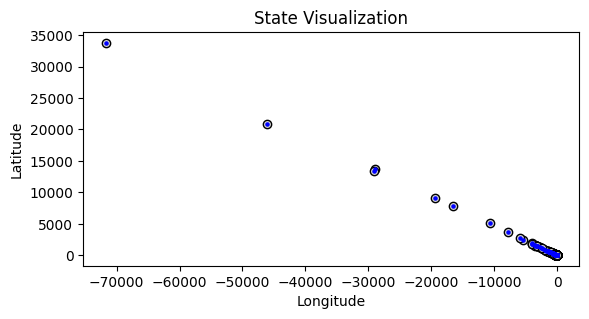

In [18]:
fig, ax = plt.subplots()
gIL.plot(ax=ax, color='lightgray', edgecolor='black')
gIL.plot(ax=ax, color='blue', markersize=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('State Visualization')
plt.show()